In [20]:
import matplotlib.pylab as plt
import pandas as pd
import matplotlib.patches as mpatches

In [4]:
# loop through the sheets of the spreadsheet; each sheet is a biological replicate
# of all 3 of the biolog plates. Columns are time in hours.
reps = {}
for i in range(0,4):
    biolog_raw = pd.read_excel('../data/experiments/biolog_raw.xlsx',sheet_name="rep_"+str(i+1))
    biolog_raw.columns = [col for col in biolog_raw.columns]
    reps[i] = biolog_raw
    
all_biolog = pd.concat([reps[0],reps[1],reps[2],reps[3]])
    
# convert to mean and std at each time point, 
# and get the max OD at all time points (from means)
mets = reps[0].index.unique()
means = {}
stds = {}
maxODs = {}
for met in mets:
    vals = pd.DataFrame()
    concat_axis = 1
    if met == 'Neg':
        concat_axis = 0
    
    for rep in reps:
        vals = pd.concat([vals,reps[rep].loc[met]],axis=concat_axis)
    
    if met != 'Neg':
        vals = vals.T
    
    means[met] = vals.mean()
    stds[met] = vals.std()
    maxODs[met] = means[met].max()


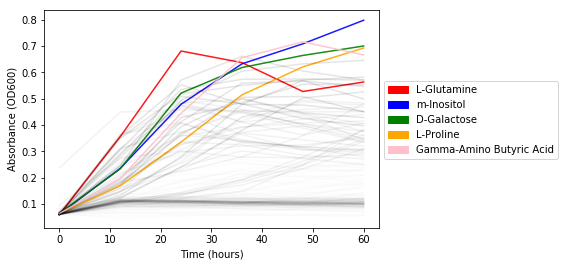

In [21]:
top_meta = []    
for met in means.keys():
    if maxODs[met] > 0.67:
            top_meta.append(met)  

fig,ax = plt.subplots()
for met in means.keys():
    plotvals = means[met]
    if maxODs[met] > 0.67:
        alpha = 0.9
        if met == 'L-Glutamine':
            c = "red" 
        elif met == 'm-Inositol':
            c = "blue"
        elif met =='D-Galactose':
            c = "green"
        elif met == 'L-Proline':
            c = "orange"
        elif met == 'gamma-Amino Butyric Acid':
            c = "pink"
    elif 0.67 > maxODs[met] > 0.5:
        alpha = 0.1
        c = "black"
    elif 0.5 > maxODs[met] > 0.3:
        alpha = 0.05
        c = "black"
    else:
        alpha = 0.01
        c = "black"
    ax.plot(plotvals.index.values,plotvals.values,alpha=alpha, c = c)
    ax.axes.set_xlabel("Time (hours)")
    ax.axes.set_ylabel("Absorbance (OD600)")
        
    top1 = mpatches.Patch(color='red', label='L-Glutamine')
    top2 = mpatches.Patch(color='blue', label='m-Inositol')
    top3 = mpatches.Patch(color='green', label='D-Galactose')
    top4 = mpatches.Patch(color='orange', label='L-Proline')
    top5 = mpatches.Patch(color='pink', label='Gamma-Amino Butyric Acid')
    ax.legend(handles=[top1, top2, top3, top4, top5], loc = "upper left", bbox_to_anchor=(1, 0.7))

    